In [1]:
import pnet_loader
import util
import torch
import seaborn as sns
import pandas as pd
import Pnet
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

%load_ext autoreload
%autoreload 2

In [2]:
def load_lusc_luad_exp():
    lusc_exp = pd.read_csv('../data/lusc_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt',
                           sep='\t').dropna().set_index('Hugo_Symbol').drop(['Entrez_Gene_Id'], axis=1).T
    lusc_exp = lusc_exp.loc[:,~lusc_exp.columns.duplicated()].copy()
    drop_list = []
    for col in lusc_exp.columns:
        if len(lusc_exp[col].value_counts()) < 400:
            drop_list.append(col)
    lusc_exp.drop(drop_list, axis=1, inplace=True)
    lusc_exp['tumor'] = 0

    luad_exp = pd.read_csv('../data/luad_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt',
                          sep='\t').dropna().set_index('Hugo_Symbol').drop(['Entrez_Gene_Id'], axis=1).T
    luad_exp = luad_exp.loc[:,~luad_exp.columns.duplicated()].copy()
    drop_list = []
    for col in luad_exp.columns:
        if len(luad_exp[col].value_counts()) < 400:
            drop_list.append(col)
    luad_exp.drop(drop_list, axis=1, inplace=True)
    luad_exp['tumor'] = 1
    tumor_dict = {0: 'LUSC', 1:'LUAD'}
    genes = list(set(lusc_exp.columns.values).intersection(luad_exp.columns.values))
    lusc_exp = lusc_exp[genes]
    luad_exp = luad_exp[genes]
    exp_data = pd.concat([luad_exp, lusc_exp])
    y = exp_data[['tumor']]
    exp_data.drop(['tumor'], axis=1, inplace=True)
    gene_set = util.select_highly_variable_genes(exp_data)['Hugo_Symbol']
    return exp_data[gene_set], y

In [3]:
lusc_luad_rna_exp, tumor_type = load_lusc_luad_exp()

lusc_cna = pd.read_csv('../data/lusc_tcga_pan_can_atlas_2018/data_cna.txt', sep='\t').set_index('Hugo_Symbol')
luad_cna = pd.read_csv('../data/luad_tcga_pan_can_atlas_2018/data_cna.txt', sep='\t').set_index('Hugo_Symbol')

lusc_cna = lusc_cna.loc[list(set(lusc_luad_rna_exp.columns).intersection(lusc_cna.index))].T
luad_cna = luad_cna.loc[list(set(lusc_luad_rna_exp.columns).intersection(luad_cna.index))].T

lusc_luad_cna = pd.concat([luad_cna, lusc_cna])

In [4]:
genetic_data = {'rna': lusc_luad_rna_exp, 'cna': lusc_luad_cna}

In [5]:
model, train_scores, test_scores, train_dataset, test_dataset = Pnet.run(genetic_data,
                                                                         tumor_type,
                                                                         verbose=True,
                                                                         early_stopping=False)

Given 2 Input modalities
Found 991 overlapping indicies
Initializing Train Dataset
Found 915 overlapping genes
generated input DataFrame of size (694, 1830)
Initializing Test Dataset
Found 915 overlapping genes
generated input DataFrame of size (297, 1830)
Found 915 overlapping genes
Epoch 1 of 300
Train scores: (0.7020237947403526, 0.5014409221902018)
Test scores: (0.7138326689851806, 0.45791245791245794)
Epoch 2 of 300
Train scores: (0.6975246451430087, 0.5014409221902018)
Test scores: (0.7112369730014994, 0.45791245791245794)
Epoch 3 of 300
Train scores: (0.6926909949662706, 0.5014409221902018)
Test scores: (0.7089617180101799, 0.45791245791245794)
Epoch 4 of 300
Train scores: (0.6875513390093098, 0.5014409221902018)
Test scores: (0.7067007777666805, 0.45791245791245794)
Epoch 5 of 300
Train scores: (0.6787339685973242, 0.5028818443804035)
Test scores: (0.7051233554929996, 0.45791245791245794)
Epoch 6 of 300
Train scores: (0.6694148885413618, 0.5288184438040345)
Test scores: (0.7025

Epoch 64 of 300
Train scores: (0.19779890346252266, 0.9726224783861671)
Test scores: (0.1913441423615221, 0.9595959595959596)
Epoch 65 of 300
Train scores: (0.21252654540092183, 0.9610951008645533)
Test scores: (0.1861220947419754, 0.9663299663299664)
Epoch 66 of 300
Train scores: (0.20052153095388275, 0.9726224783861671)
Test scores: (0.18561167026609685, 0.9764309764309764)
Epoch 67 of 300
Train scores: (0.19978560494414668, 0.968299711815562)
Test scores: (0.18068399011888087, 0.9696969696969697)
Epoch 68 of 300
Train scores: (0.19990070683811859, 0.9726224783861671)
Test scores: (0.18116430642227532, 0.9595959595959596)
Epoch 69 of 300
Train scores: (0.19772196915376428, 0.978386167146974)
Test scores: (0.18468844609629828, 0.9562289562289562)
exceeded delta
Epoch 70 of 300
Train scores: (0.19453696902272338, 0.9668587896253602)
Test scores: (0.1834551236444852, 0.9663299663299664)
exceeded delta
Epoch 71 of 300
Train scores: (0.20460615790199477, 0.9582132564841499)
Test scores: (

Epoch 124 of 300
Train scores: (0.17681785962767146, 0.962536023054755)
Test scores: (0.14024362981520117, 0.9696969696969697)
Epoch 125 of 300
Train scores: (0.17235390253644167, 0.962536023054755)
Test scores: (0.14385023502388386, 0.9696969696969697)
exceeded delta
Epoch 126 of 300
Train scores: (0.17651107331861338, 0.9654178674351584)
Test scores: (0.14426753817985355, 0.9696969696969697)
exceeded delta
Epoch 127 of 300
Train scores: (0.17081141197028696, 0.9596541786743515)
Test scores: (0.14642863321785976, 0.9696969696969697)
exceeded delta
Epoch 128 of 300
Train scores: (0.16699728429832789, 0.9654178674351584)
Test scores: (0.14202802992027616, 0.9663299663299664)
exceeded delta
Epoch 129 of 300
Train scores: (0.17306138046880276, 0.9553314121037464)
Test scores: (0.14837592860263607, 0.9696969696969697)
exceeded delta
Epoch 130 of 300
Train scores: (0.1837321220969604, 0.9510086455331412)
Test scores: (0.1517641696865711, 0.9663299663299664)
exceeded delta
Epoch 131 of 300
T

Epoch 183 of 300
Train scores: (0.14569069947564292, 0.9668587896253602)
Test scores: (0.1250404781765408, 0.9696969696969697)
Epoch 184 of 300
Train scores: (0.17518697348383044, 0.9553314121037464)
Test scores: (0.13718256163677384, 0.9629629629629629)
exceeded delta
Epoch 185 of 300
Train scores: (0.16187977653415472, 0.9639769452449568)
Test scores: (0.14341019941901517, 0.9663299663299664)
exceeded delta
Epoch 186 of 300
Train scores: (0.15196994814474232, 0.9654178674351584)
Test scores: (0.1342528339989659, 0.9696969696969697)
exceeded delta
Epoch 187 of 300
Train scores: (0.15549297428955605, 0.962536023054755)
Test scores: (0.12549225489298502, 0.9730639730639731)
Epoch 188 of 300
Train scores: (0.15796082095385286, 0.9582132564841499)
Test scores: (0.12097130239210546, 0.9696969696969697)
Epoch 189 of 300
Train scores: (0.1560900884677766, 0.9639769452449568)
Test scores: (0.11969523317484743, 0.9696969696969697)
Epoch 190 of 300
Train scores: (0.16240106261085707, 0.95389048

Epoch 242 of 300
Train scores: (0.1467928687158854, 0.9726224783861671)
Test scores: (0.13381488556010956, 0.9629629629629629)
exceeded delta
Epoch 243 of 300
Train scores: (0.14644018030304043, 0.968299711815562)
Test scores: (0.12291102778630626, 0.9696969696969697)
exceeded delta
Epoch 244 of 300
Train scores: (0.14644626169452063, 0.9596541786743515)
Test scores: (0.11837220272231182, 0.9764309764309764)
exceeded delta
Epoch 245 of 300
Train scores: (0.14500945514492067, 0.9639769452449568)
Test scores: (0.12082240798256615, 0.9663299663299664)
exceeded delta
Epoch 246 of 300
Train scores: (0.14390160577097955, 0.9711815561959655)
Test scores: (0.1136758207070707, 0.9730639730639731)
Epoch 247 of 300
Train scores: (0.14913470188547623, 0.9610951008645533)
Test scores: (0.11481042903681797, 0.9797979797979798)
Epoch 248 of 300
Train scores: (0.13847142131596546, 0.9740634005763689)
Test scores: (0.1144744346438835, 0.9764309764309764)
Epoch 249 of 300
Train scores: (0.13677674549113

Epoch 300 of 300
Train scores: (0.14142276711697538, 0.9639769452449568)
Test scores: (0.1349491414799032, 0.9663299663299664)
exceeded delta


In [6]:
x_train = train_dataset.input_df.values
additional_train = train_dataset.additional_data.values
y_train = train_dataset.target.values.reshape(-1)
x_test = test_dataset.input_df.values
additional_test = test_dataset.additional_data.values
y_test = test_dataset.target.values.reshape(-1)

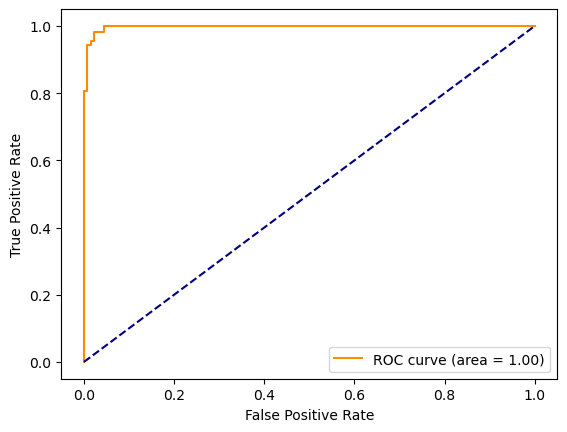

In [7]:
pred = model(torch.tensor(x_test, dtype=torch.float),
                          torch.tensor(additional_test, dtype=torch.float)
            )
y_pred_proba = pred.detach().numpy().squeeze()
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
test_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr, color="darkorange", label="ROC curve (area = %0.2f)" % test_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend(loc="lower right")
plt.savefig('PNET_subtype_val_ROC_curve.pdf')
plt.show()

In [8]:
gene_importances, additional_importances = model.deepLIFT(test_dataset)

/Users/marc/opt/anaconda3/envs/pnet/lib/python3.10/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


In [9]:
gene_imp_by_target = gene_importances.join(test_dataset.target).groupby('tumor').mean().T
gene_imp_by_target['diff'] = gene_imp_by_target[0] - gene_imp_by_target[1]
gene_imp_by_target[abs(gene_imp_by_target['diff']) > 0].nlargest(10, 'diff')

tumor,0,1,diff
VARS,0.000123,-0.005443,0.005567
GSPT1,-0.001356,-0.004897,0.003541
RBPJ,0.002750,-0.000266,0.003016
SLC16A5,0.002606,0.000414,0.002192
KATNB1,-0.001159,-0.003185,0.002026
THAP6,-0.002247,-0.004265,0.002018
PPTC7_cna,0.002367,0.000388,0.001979
MED7_cna,-0.012195,-0.014074,0.001879
CLIC4,0.003555,0.001770,0.001785
SPG11,0.003410,0.001650,0.001760


In [ ]:
['a', 'b', 'b']

In [10]:
gene_importances.sum().nlargest(20)

LAMB3_cna       2.692538
SHE_cna         2.599566
PRKACA_cna      2.443011
ADAM10_cna      1.708639
C12orf65        1.649961
ATP6V0E2_cna    1.298388
SNX9_cna        1.205611
RNF168          1.169271
MAGEF1          1.086097
MYADML2         1.028216
RPL7A_cna       0.999455
PARK2_cna       0.988318
CKS2_cna        0.963260
POLR2L          0.923236
TCF12_cna       0.854868
HDAC2_cna       0.854278
SAMM50_cna      0.824127
SNAP23_cna      0.820721
RPL32           0.769787
CLIC4           0.768413
dtype: float32

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
clf = RandomForestClassifier()
clf.fit(train_dataset.input_df.values, train_dataset.target.values.reshape(-1))

RandomForestClassifier()

In [13]:
test_acc = sum(clf.predict(test_dataset.input_df.values) == test_dataset.target.values.reshape(-1))/len(test_dataset)
test_acc

0.9259259259259259

In [14]:
pd.DataFrame(clf.feature_importances_, index=test_dataset.input_df.columns).nlargest(10, 0)

,0
EIF4G1_cna,0.028578
ST6GAL1_cna,0.024214
PIK3CA_cna,0.021915
RNF168_cna,0.014475
ECT2_cna,0.014035
POLR2H_cna,0.013647
ATR_cna,0.013050
SLC41A3_cna,0.011610
LRCH3_cna,0.011348
PAK2_cna,0.010979


In [15]:
lusc_luad_rna_exp['C21orf81'].value_counts()

-1.9473    101
-1.7997     42
-0.1781      2
-0.0013      2
-1.5166      2
          ... 
 0.3645      1
-0.5416      1
 0.8305      1
-1.1766      1
-0.7568      1
Name: C21orf81, Length: 838, dtype: int64

In [16]:
lusc_luad_rna_exp['C21orf81'].value_counts().max()/lusc_luad_rna_exp['C21orf81'].count()

0.10160965794768612

In [17]:
lusc_luad_cna

Hugo_Symbol,RUNX2,RNPEPL1,ROBO2,BET1L,CDKN1B,PTHLH,FBXO31,LOC344967,FOXD4L6,CENPM,...,CSGALNACT2,DNAJB14,ABL2,DCBLD1,PCNXL3,SNAP25,PPRC1,LDHAL6B,PMS2P9,ZNF273
Entrez_Gene_Id,860.0,57140.0,6092.0,51272.0,1027.0,5744.0,79791.0,344967.0,653404.0,79019.0,...,55454.0,79982.0,27.0,285761.0,399909.0,6616.0,23082.0,92483.0,100132832.0,10793.0
TCGA-05-4244-01,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,0.0
TCGA-05-4249-01,1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,0.0,-1.0,2.0,1.0,0.0,1.0,0.0,-1.0,-1.0,-1.0
TCGA-05-4250-01,-1.0,1.0,1.0,0.0,-1.0,2.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,1.0,1.0
TCGA-05-4382-01,0.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,...,0.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-O2-A52S-01,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,-1.0,1.0,-1.0,0.0,1.0,0.0,-1.0,0.0,1.0
TCGA-O2-A52V-01,-1.0,0.0,-1.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,0.0,...,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0
TCGA-O2-A52W-01,1.0,1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,2.0,...,-1.0,-1.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
TCGA-O2-A5IB-01,1.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,0.0


Text(0.5, 1.0, 'GPR160 CNA distribution in Lusc and Luad')

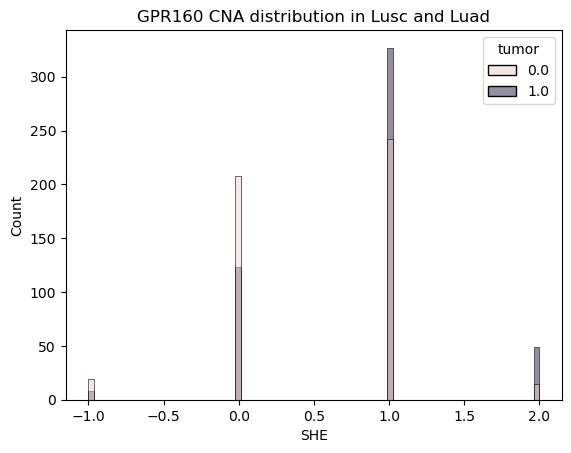

In [20]:
plot_df = lusc_luad_cna.join(tumor_type)
sns.histplot(plot_df, x='SHE', hue='tumor', bins=80)
plt.title('GPR160 CNA distribution in Lusc and Luad')
#plt.savefig('GPR160_cna_dist.pdf')

Text(0.5, 1.0, 'HIST2H3D distribution in Lusc and Luad')

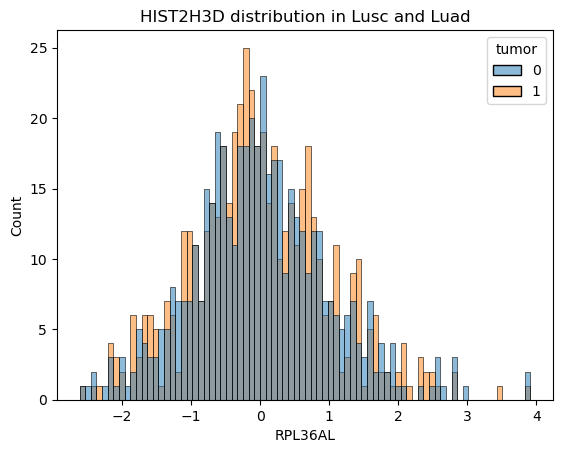

In [19]:
plot_df = lusc_luad_rna_exp.join(tumor_type)
sns.histplot(plot_df, x='RPL36AL', hue='tumor', bins=80)
plt.title('HIST2H3D distribution in Lusc and Luad')
#plt.savefig('GPR160_cna_dist.pdf')